In [28]:
%load_ext autoreload
%autoreload 2
import torch
from torch import nn, Tensor

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from probability_paths import LinearPath, GaussianPath
from model import FlowMLP
from solvers import ODESampler
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
prob_path = GaussianPath()
data = torch.tensor(make_moons(500, noise=0.1)[0]).float()
t1 = torch.tensor(1)
t2 = torch.rand(len(data), 1)

In [31]:
flow = FlowMLP()

optimizer = torch.optim.Adam(flow.parameters(), 1e-2)
loss_fn = nn.MSELoss()

for i in tqdm(range(10000)):
    x1 = Tensor(make_moons(256, noise=0.05)[0])
    x0 = torch.randn_like(x1)
    t = torch.rand(len(x1), 1)

    sample = prob_path.sample(x0, x1, t)
    
    optimizer.zero_grad()
    loss = loss_fn(flow(t=t, x=sample.xt), sample.dxt)
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        print(f'Loss: {loss.item():.4f}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Loss: 1.5654
Loss: 1.0865
Loss: 1.0571
Loss: 0.9118
Loss: 1.0144
Loss: 0.9573
Loss: 0.9308
Loss: 0.9868
Loss: 0.9246
Loss: 0.9664
Loss: 0.9822
Loss: 1.0068
Loss: 0.9107
Loss: 1.0332
Loss: 1.0267
Loss: 0.9578
Loss: 0.9535
Loss: 1.0636
Loss: 0.9696
Loss: 1.0023
Loss: 0.9647
Loss: 0.9161
Loss: 0.8862
Loss: 0.9182
Loss: 1.0797
Loss: 1.0693
Loss: 1.0842
Loss: 0.8901
Loss: 1.0117
Loss: 0.9370
Loss: 0.9791
Loss: 0.9289
Loss: 1.0076
Loss: 0.8754
Loss: 0.9144
Loss: 0.9250
Loss: 0.9022
Loss: 0.9528
Loss: 0.9619
Loss: 0.9580
Loss: 0.9932
Loss: 1.0322
Loss: 1.0850
Loss: 0.9828
Loss: 0.9397
Loss: 0.9508
Loss: 0.9260
Loss: 0.8857
Loss: 0.9537
Loss: 0.9867
Loss: 0.9752
Loss: 0.9001
Loss: 1.1335
Loss: 0.9941
Loss: 0.9868
Loss: 0.9757
Loss: 0.8336
Loss: 0.9288
Loss: 0.9349
Loss: 1.0219
Loss: 0.9083
Loss: 0.9090
Loss: 0.9243
Loss: 1.0067
Loss: 1.0784
Loss: 0.9935
Loss: 1.1322
Loss: 0.8996
Loss: 0.9444
Loss: 0.9841
Loss: 1.0447
Loss: 1.0040
Loss: 0.9712
Loss: 0.8732
Loss: 1.0253
Loss: 0.9032
Loss: 0.9141

In [32]:
x0 = torch.randn(500,2)
odesolver = ODESampler()
t0 = torch.zeros(len(x0),1)
t1 = torch.ones(len(x0),1)
timesteps = 10
samples = odesolver.sample(flow, x0, timesteps=timesteps, method="midpoint", return_path=False)

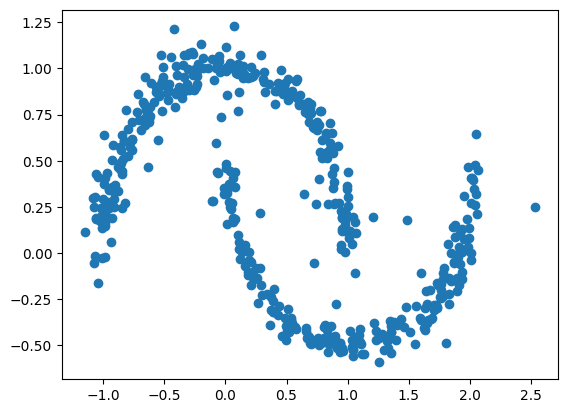

In [33]:
plt.scatter(samples[:,0], samples[:,1])